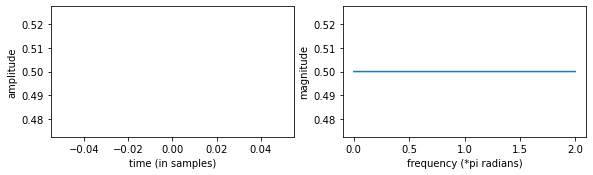

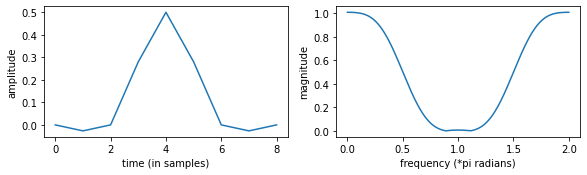

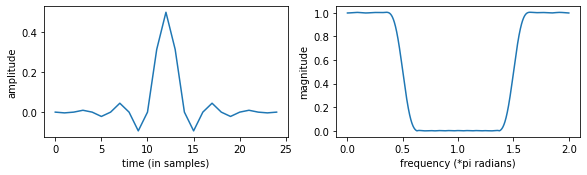

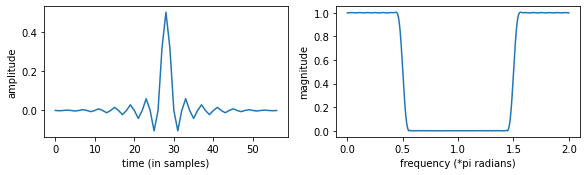

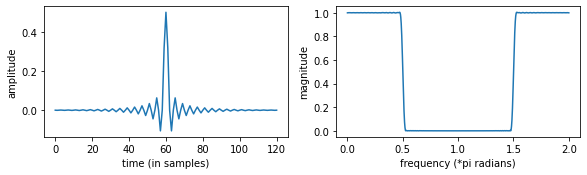

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import librosa


def firFFT(order):
    H = np.concatenate((np.ones(order//2), np.zeros(order//2)))
    NFFT = (len(H)-1)*2
    H = np.concatenate((H, np.flip(H)[1:])) + np.zeros(NFFT+1)*(1j)
    h = np.fft.ifft(H, NFFT)
    h_new = np.concatenate((np.flip(h)[int(NFFT / 2):-1], h[0:int(NFFT / 2)]))

    win = librosa.filters.get_window('hamming', len(h_new), fftbins=False)

    return (h_new * win).real

def drawFIRFFT(h, NFFT=512):
    plt.subplot(1,2,1)
    plt.plot(h)
    plt.xlabel('time (in samples)')
    plt.ylabel('amplitude')
    plt.subplot(1,2,2)
    NFFT = max(len(h), NFFT)
    xticks=np.linspace(0, 2, num=NFFT, endpoint=True)
    plt.plot(xticks, np.abs(np.fft.fft(h, NFFT)))
    plt.xlabel('frequency (*pi radians)')
    plt.ylabel('magnitude')
    plt.show()
    return h


for order in [2,6,14,30,62]:
    h = firFFT(order)
    plt.figure(figsize=(8,3) * np.array([1.2, 0.8]))
    drawFIRFFT(h, NFFT=2048)